In [11]:
RESULTS_FOLDER_PIX2CODE = "../../results/pix2code/pix2code/"
RESULTS_FOLDER_PIX2CODE_HTML = "../../results/pix2code/pix2code_web_with_html/"
RESULTS_FOLDER_PIX2CODE_HTML_LI = "../../results/pix2code/pix2code_web_with_html_loremipsum/"

In [4]:
import pandas as pd
import os
import json

In [17]:
def get_df(folder):
    # Load all json files into a list of dataframes
    all_json_files = [folder + "/" + file for file in os.listdir(folder) if file.endswith(".json")]

    dataframes = []

    for file_path in all_json_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
        dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

    # Combine all dataframes into one
    df = pd.concat(dataframes, ignore_index=True)

    df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
    }, inplace=True)

    return df

In [18]:
df1 = get_df(RESULTS_FOLDER_PIX2CODE)
df2 = get_df(RESULTS_FOLDER_PIX2CODE_HTML)
df3 = get_df(RESULTS_FOLDER_PIX2CODE_HTML_LI)
df1['experiment'] = 'Pix2Code'
df2['experiment'] = 'Pix2Code_HTML'
df3['experiment'] = 'Pix2Code_HTML_LI'

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [19]:
combined_df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,similarity_index,len_pren,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,349.00000,349.000000,349.000000,349.000000
mean,1811.982792,1822.292543,1825.923518,0.934900,70.065010,0.054614,0.968601,2543.30086,0.976408,0.939828,0.017574
std,1068.247836,1079.854338,1079.018799,0.066719,80.682432,0.054124,0.026934,310.05991,0.027349,1.360080,0.025219
min,84.000000,84.000000,84.000000,0.781053,0.000000,0.000000,0.874937,1575.00000,0.879358,0.000000,0.000000
25%,388.000000,387.000000,388.000000,0.860566,9.000000,0.006511,0.954587,2589.00000,0.954584,0.000000,0.000000
50%,2589.000000,2596.000000,2596.000000,0.967668,29.000000,0.029940,0.971723,2679.00000,0.989626,0.000000,0.000000
75%,2685.500000,2706.000000,2706.500000,0.992138,155.000000,0.113089,0.992032,2690.00000,1.000000,2.000000,0.036364
max,3195.000000,3218.000000,3218.000000,1.000000,292.000000,0.187781,0.999505,3195.00000,1.000000,4.000000,0.108108


In [32]:
metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score",  "edit_distance", "normalized_edit_distance", "similarity_index", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance", "structural_BLEU_score"]
common_metrics = metrics[:-3] 
other_metrics = metrics[-3:] 

In [33]:
common_metrics

['prediction_length',
 'answer_length',
 'max_length',
 'BLEU_score',
 'edit_distance',
 'normalized_edit_distance',
 'similarity_index']

In [34]:
other_metrics

['HTML_tree_edit_distance',
 'normalized_HTML_tree_edit_distance',
 'structural_BLEU_score']

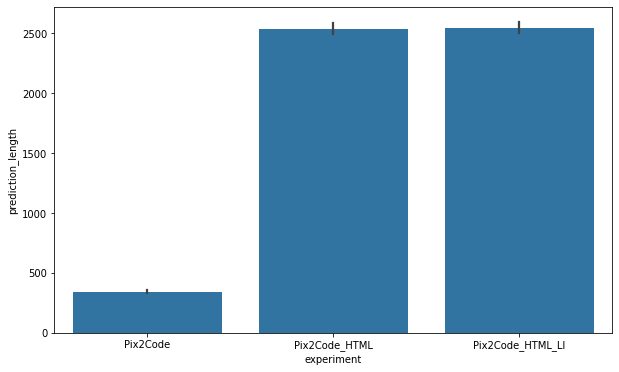

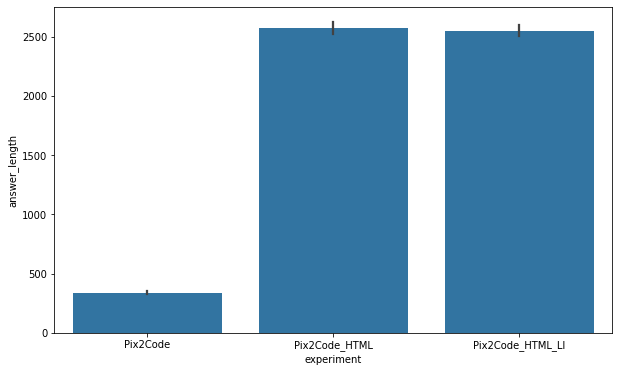

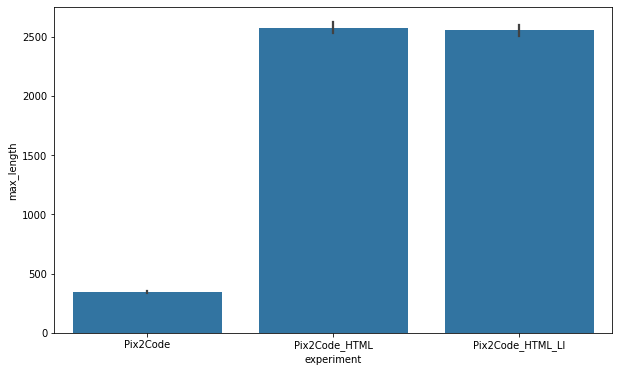

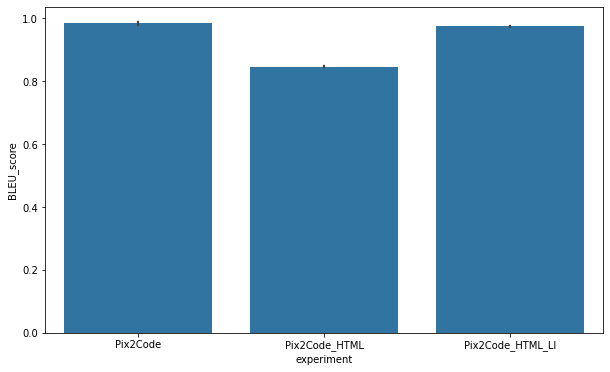

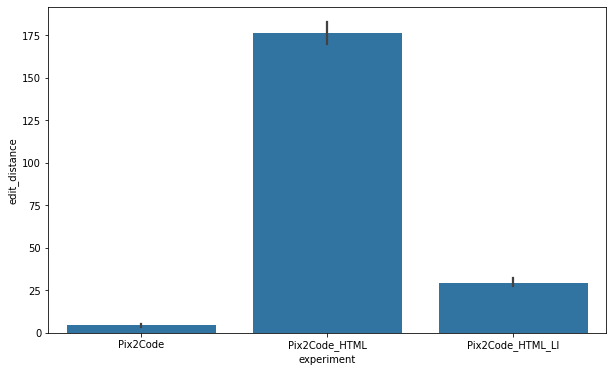

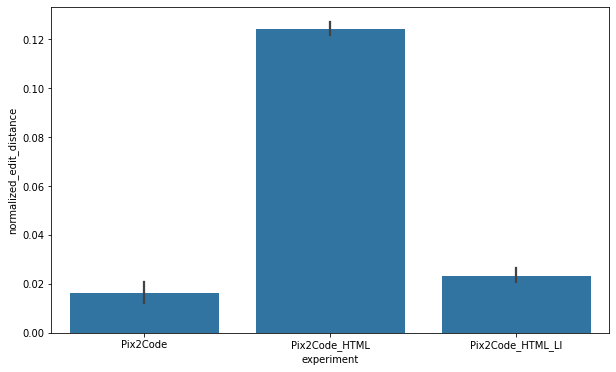

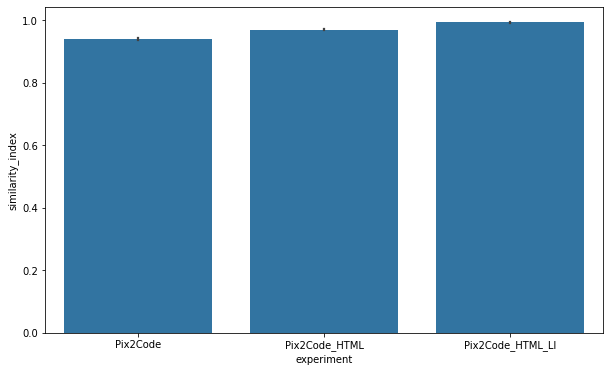

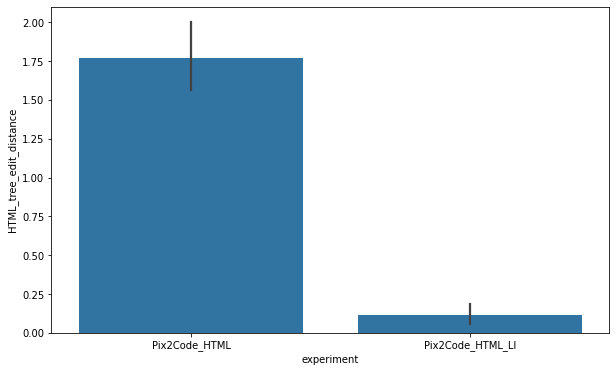

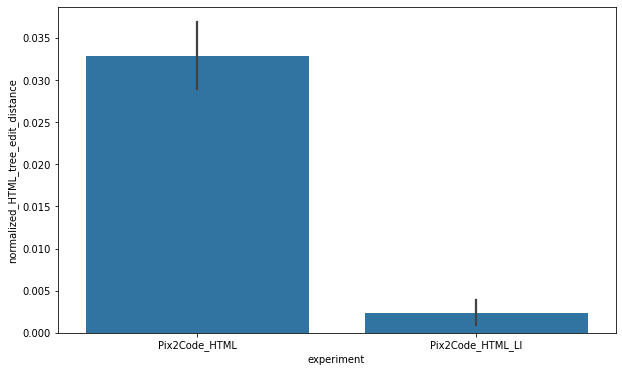

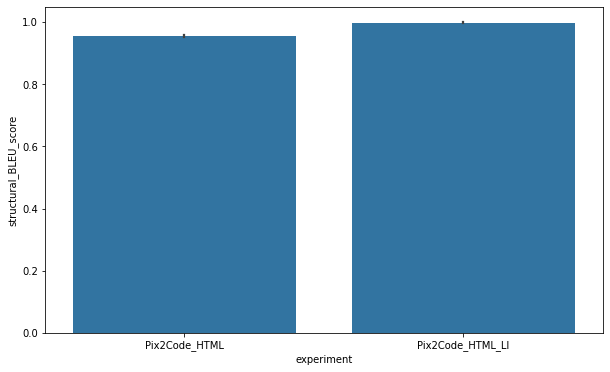

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

for metric in common_metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x='experiment', y=metric, data=combined_df)
    #plt.title(f'Average {metric} Across Experiments')
    plt.ylabel(metric)
    #plt.xlabel('Experiment')
    plt.show()


for metric in other_metrics:
    filtered_df = combined_df[combined_df['experiment'] != "Pix2Code"]
    plt.figure(figsize=(10,6))
    sns.barplot(x='experiment', y=metric, data=filtered_df)
    #plt.title(f'Average {metric} Across Experiments')
    plt.ylabel(metric)
    #plt.xlabel('Experiment')
    plt.show()

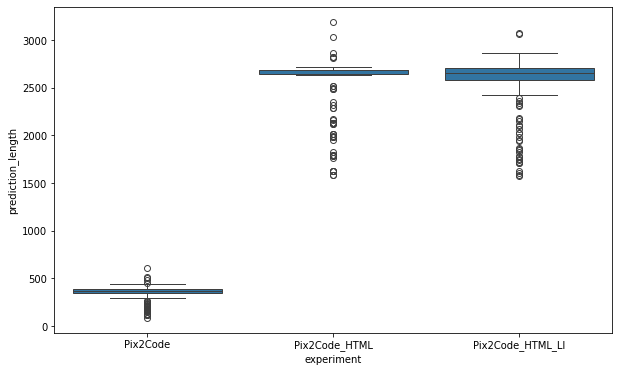

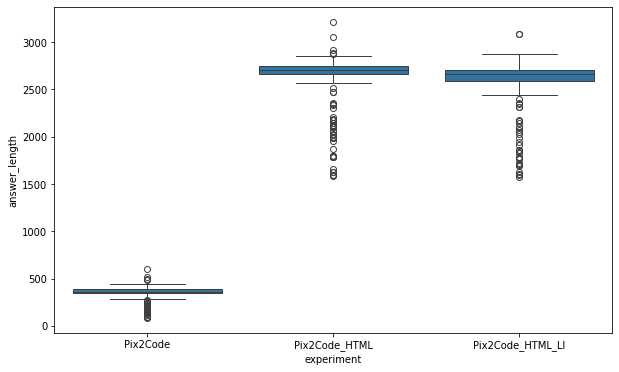

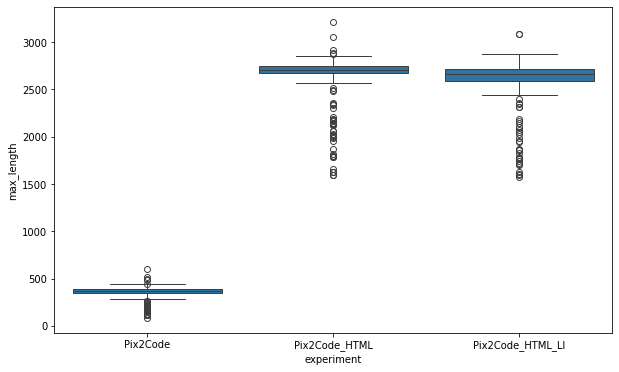

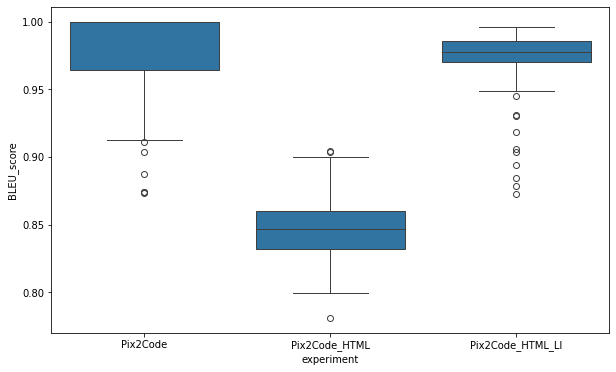

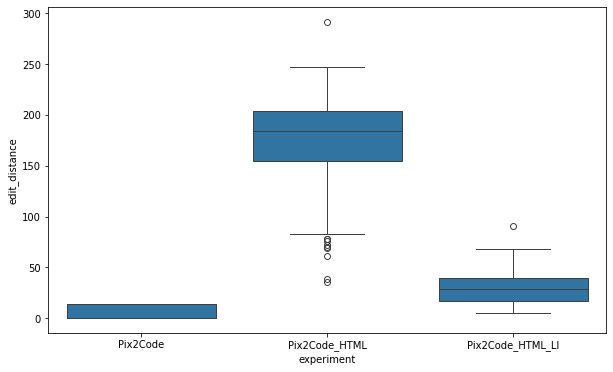

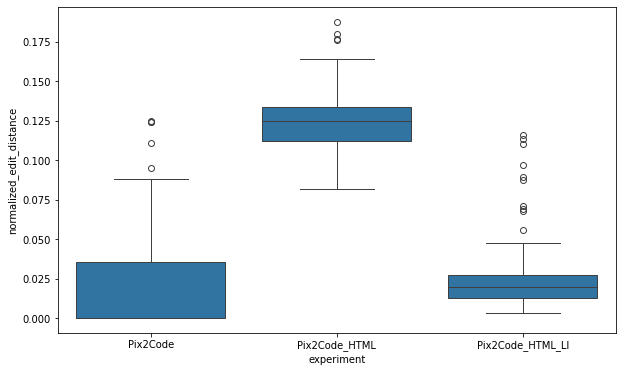

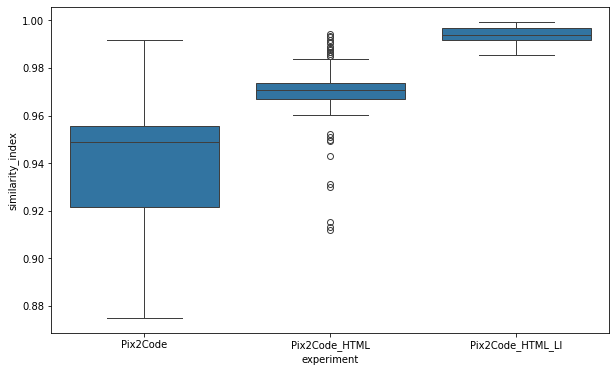

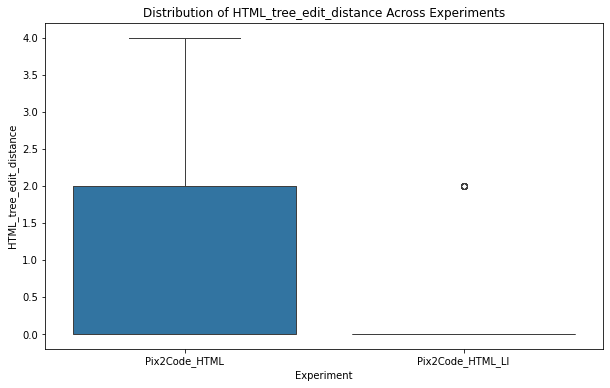

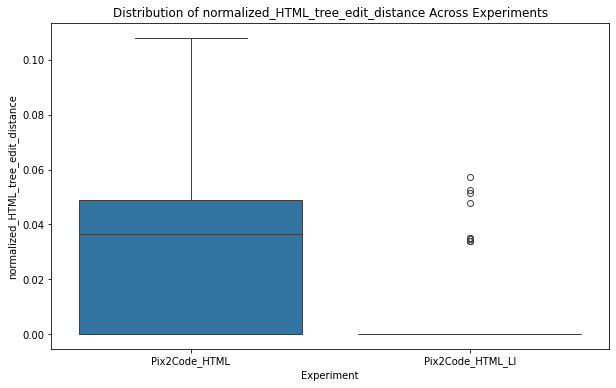

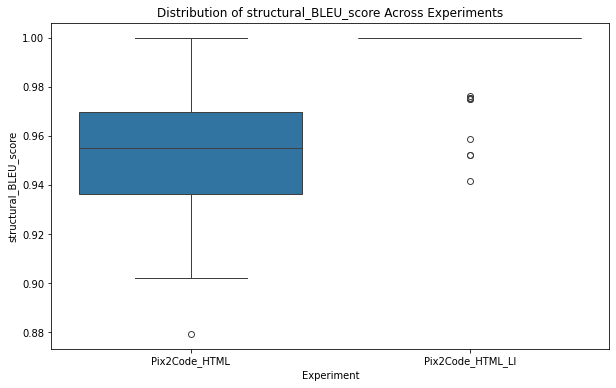

In [45]:
for metric in common_metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='experiment', y=metric, data=combined_df)
    #plt.title(f'Distribution of {metric} Across Experiments')
    plt.ylabel(metric)
    #plt.xlabel('Experiment')
    plt.show()

for metric in other_metrics:
    filtered_df = combined_df[combined_df['experiment'] != "Pix2Code"]
    plt.figure(figsize=(10,6))
    sns.boxplot(x='experiment', y=metric, data=filtered_df)
    plt.title(f'Distribution of {metric} Across Experiments')
    plt.ylabel(metric)
    plt.xlabel('Experiment')
    plt.show()

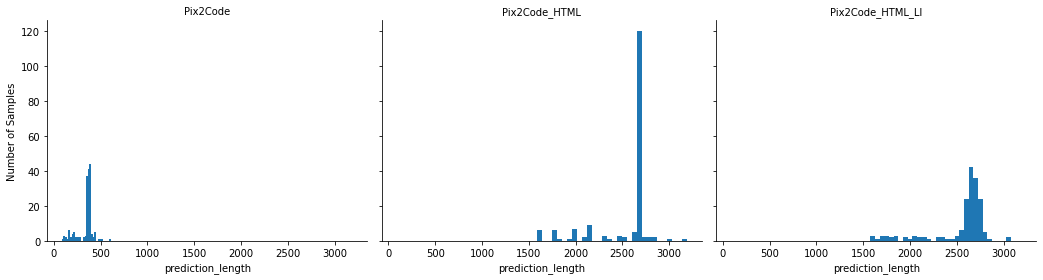

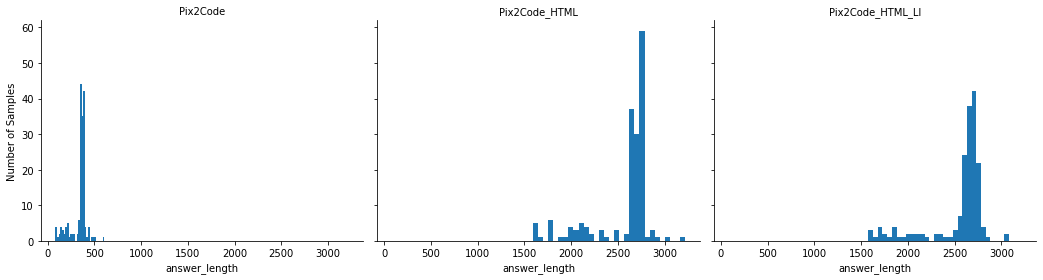

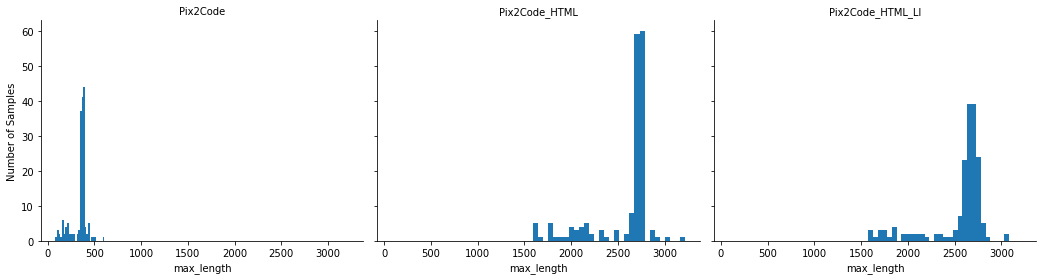

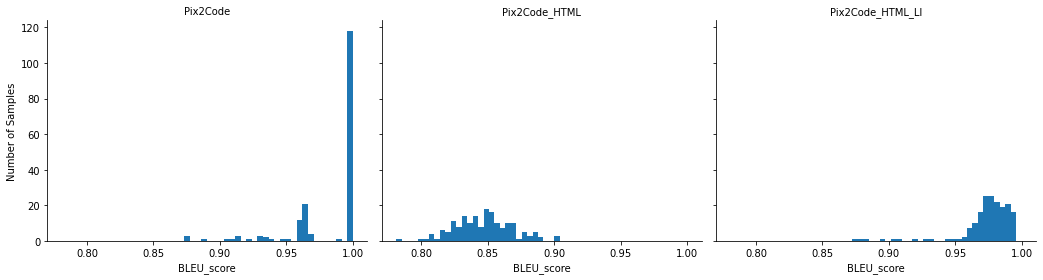

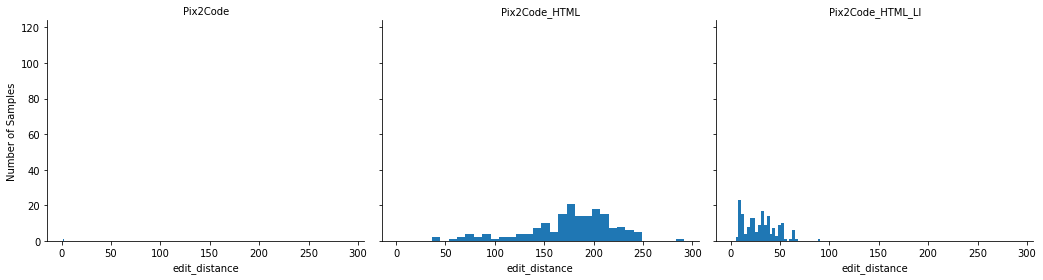

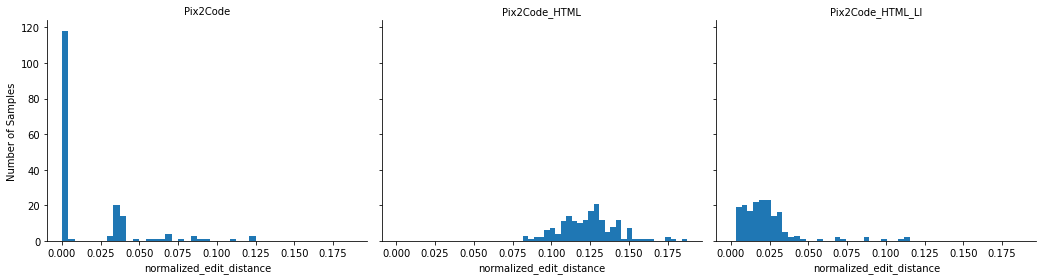

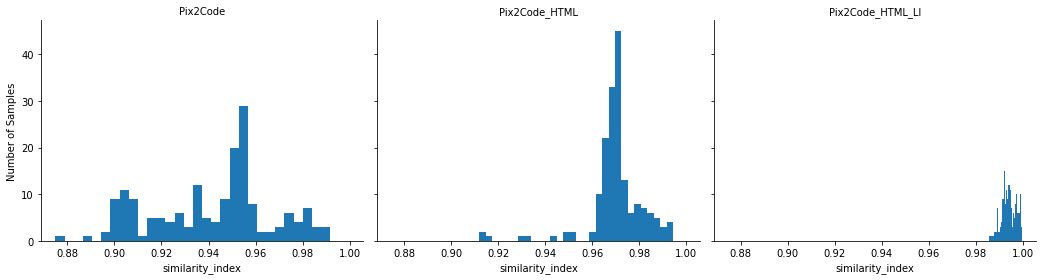

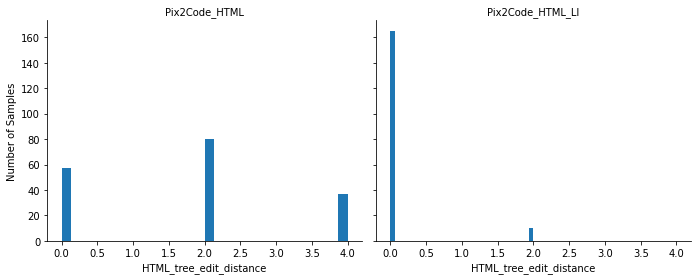

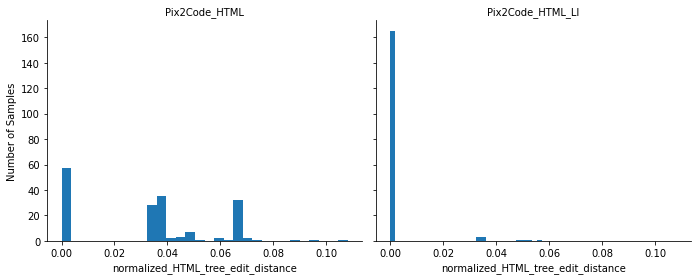

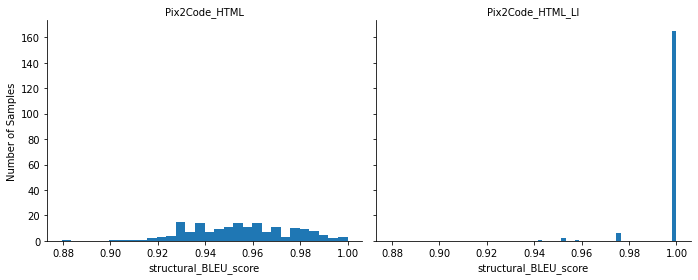

In [46]:
for metric in common_metrics:
    g = sns.FacetGrid(combined_df, col="experiment", height=4, aspect=1.2)
    g.map(plt.hist, metric, bins=30)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(metric, "Number of Samples")
    #plt.suptitle(f'Distribution of {metric} by Experiment', y=1.05)
    plt.show()

for metric in other_metrics:
    filtered_df = combined_df[combined_df['experiment'] != "Pix2Code"]
    g = sns.FacetGrid(filtered_df, col="experiment", height=4, aspect=1.2)
    g.map(plt.hist, metric, bins=30)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(metric, "Number of Samples")
    #plt.suptitle(f'Distribution of {metric} by Experiment', y=1.05)
    plt.show()

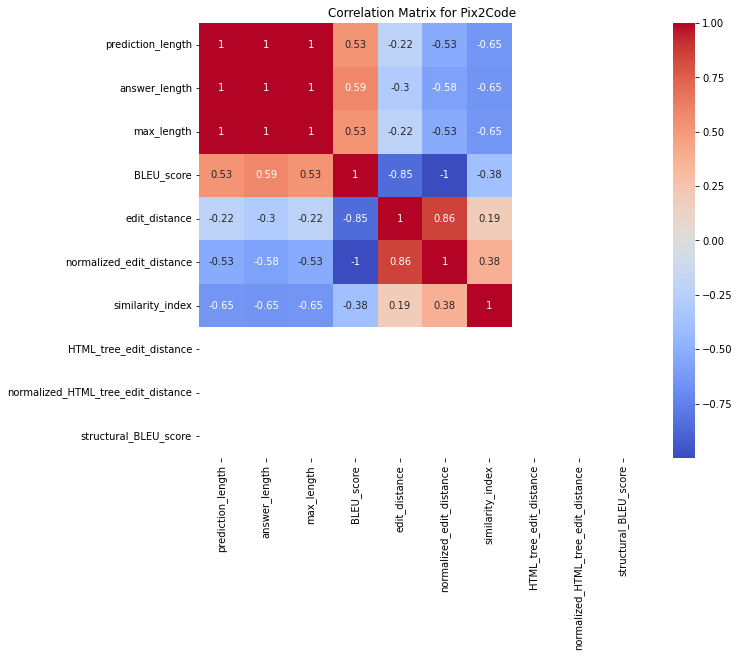

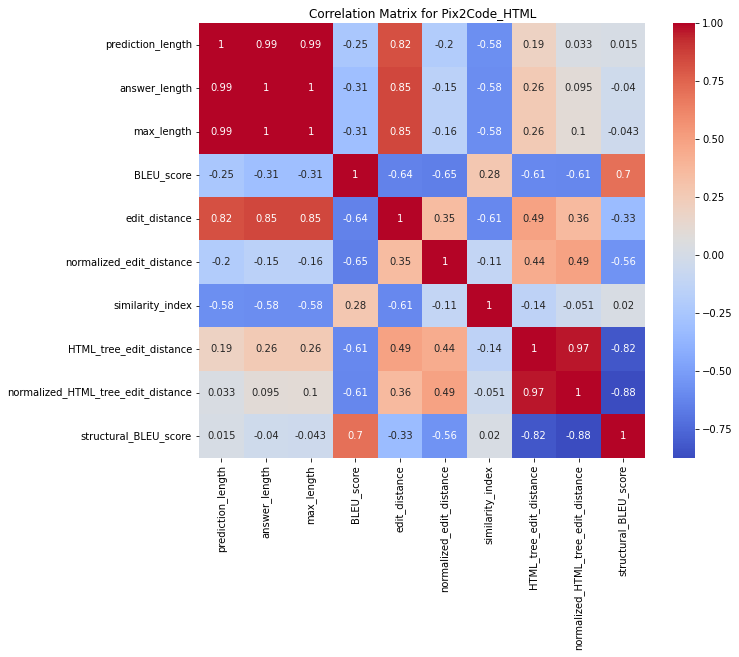

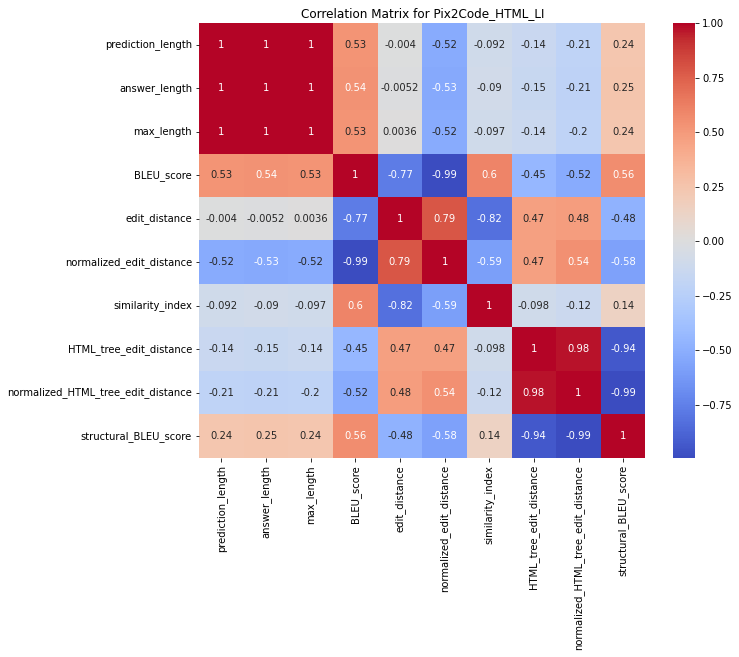

In [38]:
for exp in combined_df['experiment'].unique():
    subset = combined_df[combined_df['experiment'] == exp]
    correlation_matrix = subset[metrics].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {exp}')
    plt.show()


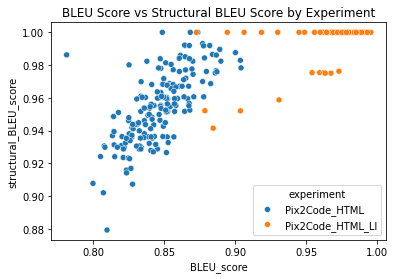

In [39]:
sns.scatterplot(x='BLEU_score', y='structural_BLEU_score', hue='experiment', data=filtered_df)
plt.title('BLEU Score vs Structural BLEU Score by Experiment')
plt.show()


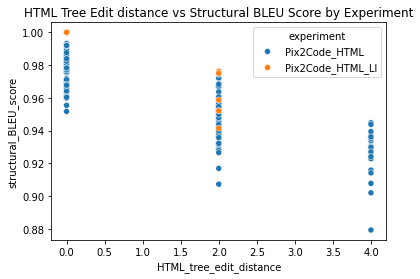

In [43]:
sns.scatterplot(x='HTML_tree_edit_distance', y='structural_BLEU_score', hue='experiment', data=filtered_df)
plt.title('HTML Tree Edit distance vs Structural BLEU Score by Experiment')
plt.show()


In [1]:
RESULTS_FOLDER_PIX2CODE_PIX2STRUCT = "../../results/pix2code/pix2code/"
RESULTS_FOLDER_PIX2CODE_LSTM = "../../results/pix2code/pix2code_lstm/"

In [2]:
def get_df(folder):
    # Load all json files into a list of dataframes
    all_json_files = [folder + "/" + file for file in os.listdir(folder) if file.endswith(".json")]

    dataframes = []

    for file_path in all_json_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
        dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

    # Combine all dataframes into one
    df = pd.concat(dataframes, ignore_index=True)

    df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ssim_index': 'similarity_index'
    }, inplace=True)

    return df

In [16]:
df2 = get_df(RESULTS_FOLDER_PIX2CODE_PIX2STRUCT)
df1 = get_df(RESULTS_FOLDER_PIX2CODE_LSTM)
df2['experiment'] = 'Pix2Struct model'
df1['experiment'] = 'Pix2Code Pytorch model'

combined_df = pd.concat([df1, df2], ignore_index=True)

In [17]:
metrics = ["BLEU_score",  "edit_distance", "normalized_edit_distance", "similarity_index"]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


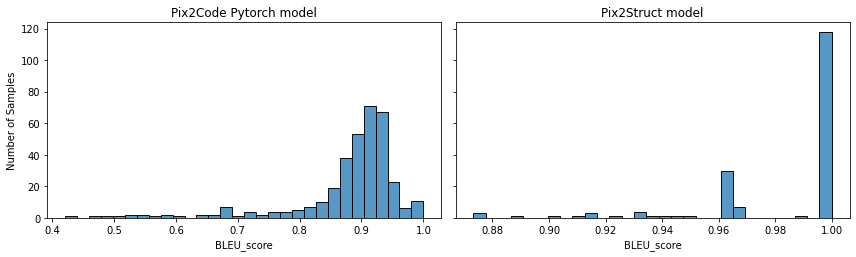

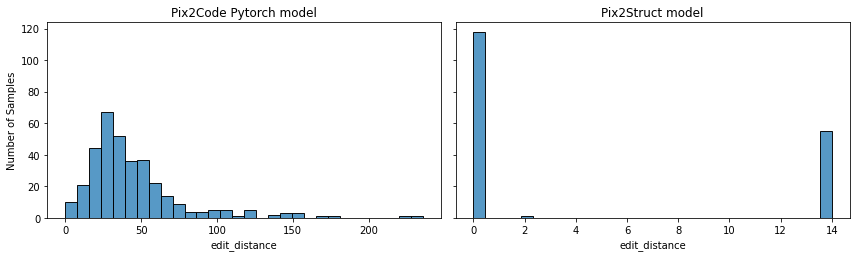

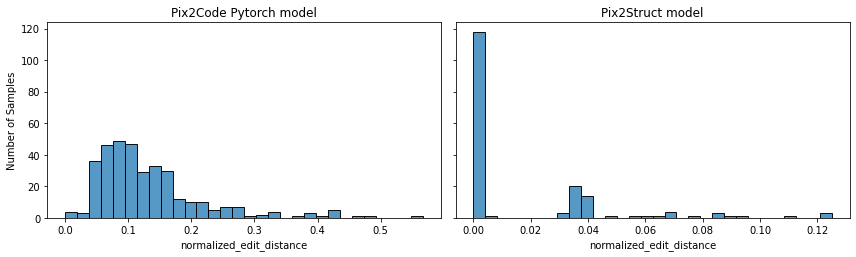

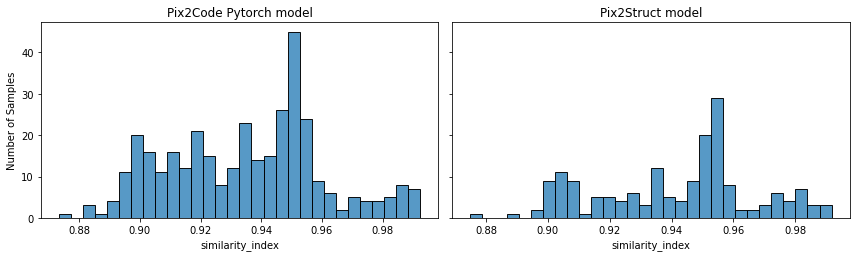

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# assuming metrics and combined_df are defined previously
for metric in metrics:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)  # 1 row, 2 columns of plots
    experiments = combined_df['experiment'].unique()
    
    for i, experiment in enumerate(experiments):
        data = combined_df[combined_df['experiment'] == experiment][metric]
        # Calculating the dynamic bin sizes based on data
        bin_size = (data.max() - data.min()) / 30  # 30 is chosen arbitrarily, adjust as needed
        bins = int((data.max() - data.min()) / bin_size)
        
        sns.histplot(data, bins=bins, ax=axes[i], kde=False)  # You may add `kde=True` if you want the Kernel Density Estimate line as well
        axes[i].set_title(f"{experiment}")
        axes[i].set_xlabel(f"{metric}")
        axes[i].set_ylabel("Number of Samples")
        
    #plt.suptitle(f'Distribution of {metric} by Experiment')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure titles do not overlap
    plt.show()
